# Complexité des opérations <BR>d'un arbre binaire de recherche

La plupart des opérations sur un ABR se caractérisent par une descente dans l'arbre depuis la racine 

* jusqu'au noeud cherché  
    * `chercher`, `noeud_min`
    * `noeud_suivant` dans un arbre sans attribut `parent`
    * `element_d_indice_n`, `indice_de_l_element`
    
* jusqu'au noeud à supprimer (`supprimer_min` /  `supprimer`)
* jusqu'à l'emplacement où insérer (`inserer`)

Dans tous les cas, la complexité est donc $\Theta(p)$ avec $p$ la profondeur du noeud en question. 

Il y a deux exceptions à cette règle. 

* Le parcours complet d'un arbre a une complexité linéaire au nombre d'éléments 
    * chaque élément est parcouru une fois
    * il y a au maximum 3 transitions de parent à enfant ou vice-versa par élément
    
    
* Pour les mêmes raisons, la fonction `noeud_suivant` dans un ABR stockant un lien vers le noeud parent a une complexité moyenne constante $\Theta(1)$, puisque l'appliquer $n$ fois revient à effectuer un parcours

## Hauteur et profondeur

* la **hauteur** d'un noeud est la distance maximale entre ce noeud et les feuilles de son sous-arbre


* la **profondeur** d'un noeud est la distance entre ce noeud et la racine de l'arbre


La hauteur d'un arbre est donc la profondeur maximale de ses noeuds. Elle nous donne le pire cas pour les opérations en $\Theta(p)$. 

Le meilleur cas sera toujours en $\Theta(1)$ quand le noeud pertinent est la racine. 

Pour le cas moyen, il nous faut évaluer la profondeur moyenne.

Nous utilisons l'ABR suivant

In [1]:
import include.helpers as h

class Noeud:
    def __init__(self,val):
        self.clef = val
        self.gauche = None
        self.droite = None   
    def __str__(self): 
        return "{}".format(self.clef)
    
def inserer(R,val):
    if R == None:      R = Noeud(val)      
    elif val < R.clef: R.gauche = inserer(R.gauche,val)    
    elif val > R.clef: R.droite = inserer(R.droite,val)
    else:              pass
    return R

La hauteur se calcule récursivement

In [2]:
def hauteur(R):
    if R == None: 
        return 0
    return 1 + max(hauteur(R.droite),
                   hauteur(R.gauche)) 

Pour la profondeur moyenne, la récursion doit propager un argument supplémentaire qui indique la profondeur de récursion. 

Il commence à 0 ou 1 selon la profondeur que l'on assigne arbitrairement à la racine

In [3]:
def profondeur_moyenne(R,p):
    if R == None: return 0,0,0
    moy_g, tot_g, n_g = profondeur_moyenne(R.gauche,p+1)
    moy_d, tot_d, n_d = profondeur_moyenne(R.droite,p+1)
    n_tot = n_g + n_d + 1
    prof_tot = tot_g + tot_d + p
    prof_moy = prof_tot / n_tot
    return prof_moy, prof_tot, n_tot

## Meilleur cas

Dans le meilleur cas, l'arbre est **plein**. Tous les noeuds sont de degré 2 sauf éventuellement ceux du niveau le plus profond. 

Une manière de générer le meilleur arbre consiste à prendre l'élément médian comme racine, puis à générer les sous-arbres droit et gauche récursivement avec les deux partitions autour de cet élément médian.

La fonction suivante trie un tableau pour trouver en trouver facilement les éléments médians. Il retourne un arbre le moins haut possible pour stocker le tableau T.

In [4]:
def meilleur_R(T):
    n = len(T)
    if n >= 1:
        mid = n // 2
        R = Noeud(T[mid])
        R.gauche = meilleur_R(T[:mid])
        R.droite = meilleur_R(T[mid+1:])
        return R
    else: return None
    
def meilleur(T): return meilleur_R(sorted(T))

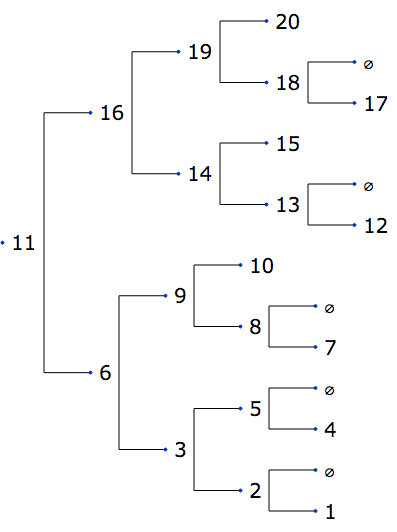

In [5]:
# exemple de meilleur cas 
h.afficher_arbre_binaire(meilleur(range(1,21)))

## Pire cas 

Dans le pire cas, l'arbre est **dégénéré**. Tous les noeuds sont de degré 1 sauf évidemment l'unique feuille du niveau le plus profond.

Une manière de générer le pire arbre consiste à prendre l'élément minimum ou maximum comme racine, puis de générer l'unique sous-arbre non vide avec le reste des éléments. 

La fonction suivante retourne un arbre le plus haut possible pour stocker le tableau T.

In [6]:
def pire_R(T,i):
    if i < len(T):
        R = Noeud(T[i])
        R.droite = pire_R(T,i+1)
        return R
    else: return None
    
def pire(T): return pire_R(sorted(T),0)

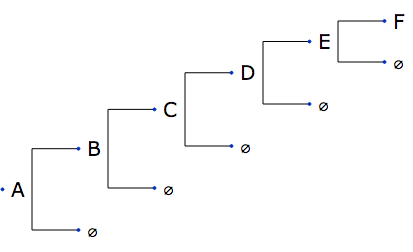

In [13]:
# exemple de pire cas 
h.afficher_arbre_binaire(pire("ABFDCE"))

## Cas moyen

Enfin, pour estimer le cas moyen, nous allons la fonction suivante qui génère l'arbre aléatoirement

In [8]:
import numpy as np
def aleatoire(T):
    n = len(T)
    if n >= 1:
        p = np.random.randint(0,n-1) if n > 1 else 0
        R = Noeud(T[p])
        R.gauche = aleatoire(T[:p])
        R.droite = aleatoire(T[p+1:])
        return R
    else: return None

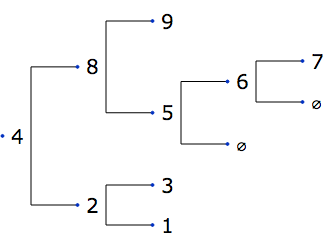

In [9]:
# exemple de cas aléatoire 
h.afficher_arbre_binaire(aleatoire(range(1,10)))

## Hauteurs et profondeurs moyennes

In [10]:
import numpy as np
X = np.logspace(1,3)
LOGX = [ np.log(x) for x in X ]
MP = []; PP = []; AP = []; MH = []; PH = []; AH = []

for x in X:
    T = range(0,int(x))
    R = meilleur(T)
    MP.append(profondeur_moyenne(R,1)[0])
    MH.append(hauteur(R))
    
    R = pire(T)
    PP.append(profondeur_moyenne(R,1)[0])
    PH.append(hauteur(R))
    
    R = aleatoire(T)
    AP.append(profondeur_moyenne(R,1)[0])
    AH.append(hauteur(R))

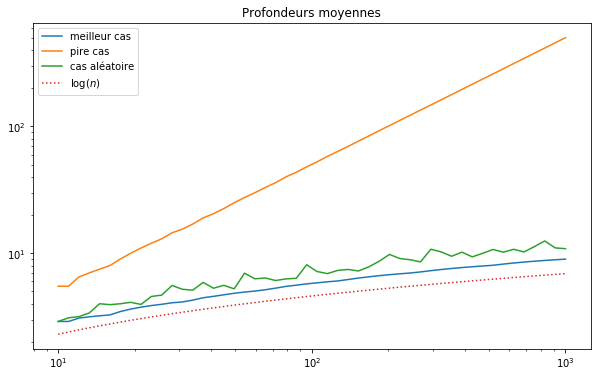

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title('Profondeurs moyennes')
plt.loglog(X,MP,label='meilleur cas')
plt.loglog(X,PP,label='pire cas')
plt.loglog(X,AP,label='cas aléatoire')
plt.loglog(X,LOGX,label='$\log(n)$',linestyle='dotted')
plt.legend(); plt.show()

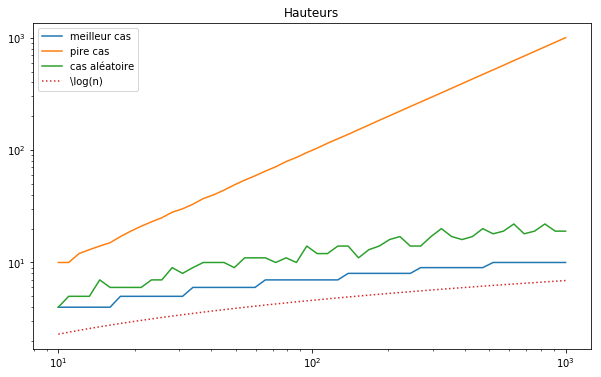

In [12]:
plt.figure(figsize=(10,6))
plt.title('Hauteurs')
plt.loglog(X,MH,label='meilleur cas')
plt.loglog(X,PH,label='pire cas')
plt.loglog(X,AH,label='cas aléatoire')
plt.loglog(X,LOGX,label='\log(n)',linestyle='dotted')
plt.legend(); plt.show()

## Conclusion

Le parcours d'un ABR de $n$ éléments a une complexité linéaire $\Theta(n)$

Toutes les autres opérations ont une complexité $\Theta(p)$ proportionnelle à la **profondeur** $p$ du noeud pertinent pour l'opération. 

Dans le **meilleurs** cas et le cas **moyen** cela correspond à $\Theta(\log(n))$, la profondeur étant proportionnelle au logarithme de la taille. 

Dans le **pire** cas, l'arbre dégénère et la complexité devient $\Theta(n)$. Malheureusement, **le pire cas est fréquent**: il correspond entre autres à insérer les éléments dans l'ordre ou l'ordre inverse. 

<table style="width: 100%; border: 0px">
<tr style="background-color:white; border:0px">
<td style="width: 120px; border: 0px">
    <img src="https://heig-vd.ch/ResourcePackages/WhiteFox/assets/images/logo-heig-vd.svg" height=200px align=left >
    </td>
    <td style="vertical-align: middle; border: 0px" height=200px>
    <p style="text-align: left">
        <a href="https://ocuisenaire.github.io/ASD1-notebooks/">ASD1 Notebooks on GitHub.io</a>
 </p>        
<p style="text-align: left">
© Olivier Cuisenaire, 2018 </p>
</td>
</tr>
</table>